Luise Hauptmann

# Unsupervised Learning: Trade & Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

___
## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA


In [2]:
# import data 
# loading the dataset
data = pd.read_csv("stock_data.csv")

___
## Data Overview

- Observations
- Sanity checks

In [3]:
# observe first 5 rows of data set
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [4]:
# understanding the shape of the dataset
print("The data has", data.shape[0], "rows and", data.shape[1], "columns")

The data has 340 rows and 15 columns


In [5]:
# get info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [6]:
# fixing column names
data.columns = [c.replace(" ", "_") for c in data.columns]

In [7]:
# check for duplicated values
data.duplicated().sum()

0

In [8]:
# check for missing values in the data
data.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

In [9]:
# view statistical summary of data
data.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker_Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [10]:
# Ticker_Symbol is an abbreviation to identify the stocks, and is not required for further analysis
# Dropping Ticker Symbol
data.drop("Ticker_Symbol", axis=1, inplace=True)

In [11]:
# check column drop
# understanding the shape of the dataset
print("The data has", data.shape[0], "rows and", data.shape[1], "columns.")

The data has 340 rows and 14 columns.


___
## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Functions

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

### Univariate Analysis

#### `GICS Sector`

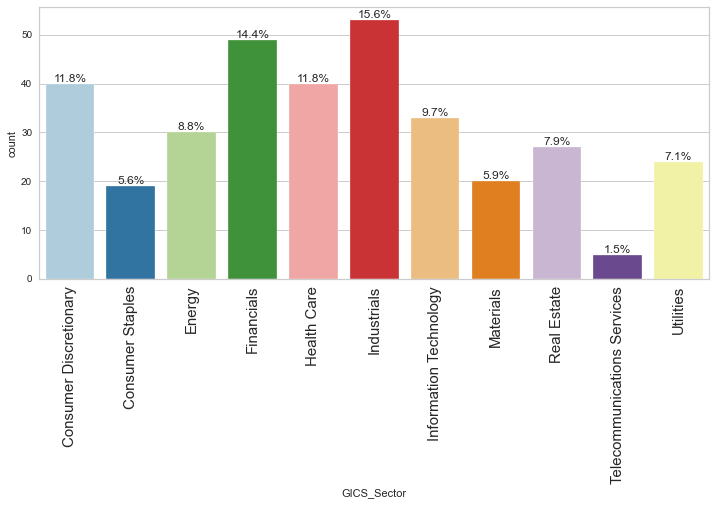

In [15]:
labeled_barplot(data, "GICS_Sector", perc=True)

- The largest sectors are industrials, financials, and healthcare/consumer discretionary respectively. 

#### `GICS Sub Industry`

In [16]:
pd.crosstab(data.GICS_Sub_Industry, data.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
GICS_Sub_Industry,,,,,,,,,,,
Advertising,2,0,0,0,0,0,0,0,0,0,0
Aerospace & Defense,0,0,0,0,0,4,0,0,0,0,0
Agricultural Products,0,1,0,0,0,0,0,0,0,0,0
Air Freight & Logistics,0,0,0,0,0,3,0,0,0,0,0
Airlines,0,0,0,0,0,5,0,0,0,0,0
Alternative Carriers,0,0,0,0,0,0,0,0,0,1,0
"Apparel, Accessories & Luxury Goods",1,0,0,0,0,0,0,0,0,0,0
Application Software,0,0,0,0,0,0,2,0,0,0,0
Asset Management & Custody Banks,0,0,0,4,0,0,0,0,0,0,0


#### `Current Price`

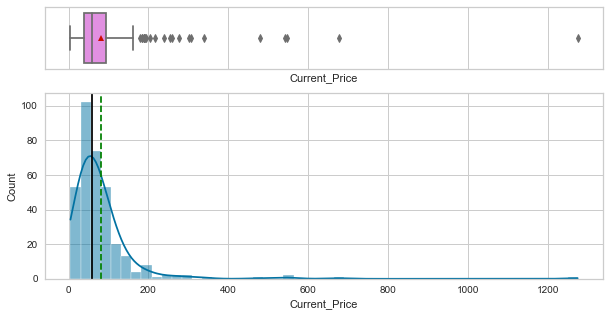

In [17]:
histogram_boxplot(data, num_cols[0], bins=50, kde=True, figsize=(10, 5))

- Current price is skewed to the right, with the median current price between 100-200.

#### `Price Change`

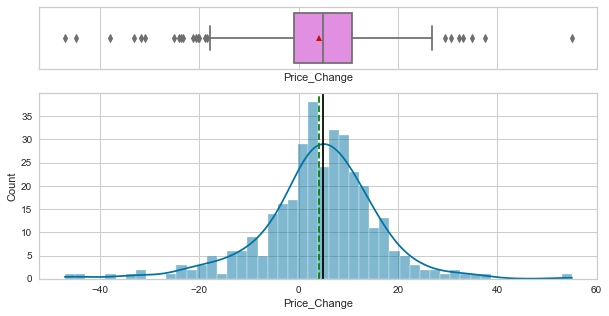

In [18]:
histogram_boxplot(data, num_cols[1], bins=50, kde=True, figsize=(10, 5))

- Price change shows normal distribution, with the median price slightly offset at around 5-10.

#### `Volatility`

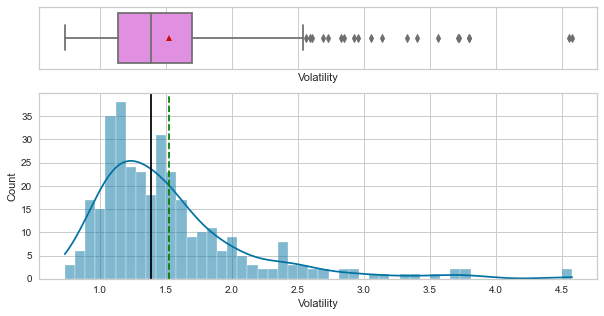

In [19]:
histogram_boxplot(data, num_cols[2], bins=50, kde=True, figsize=(10, 5))

- Volatility is skewed to the right, with median volatility at approximately 1.6

#### `ROE`

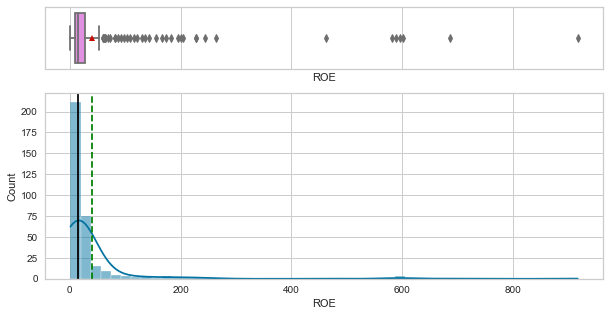

In [20]:
histogram_boxplot(data, num_cols[3], bins=50, kde=True, figsize=(10, 5))

- ROE is heavily skewed to the right, with the average ROE very close to 0.

#### `Cash Ratio`

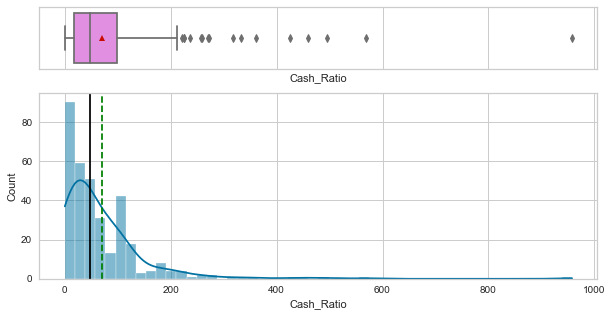

In [21]:
histogram_boxplot(data, num_cols[4], bins=50, kde=True, figsize=(10, 5))

- Cash ratio is skewed heavily to the right, with the median cash ratio at approximately 75.

#### `Net Cash Flow`

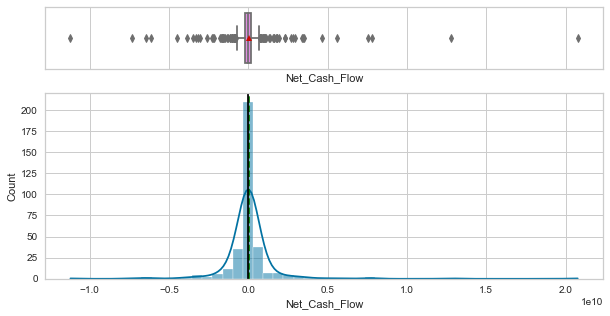

In [22]:
histogram_boxplot(data, num_cols[5], bins=50, kde=True, figsize=(10, 5))

- Net cash flow is distributed normally at 0.0, with a few outliers that might need to be treated later. 

#### `Net Income`

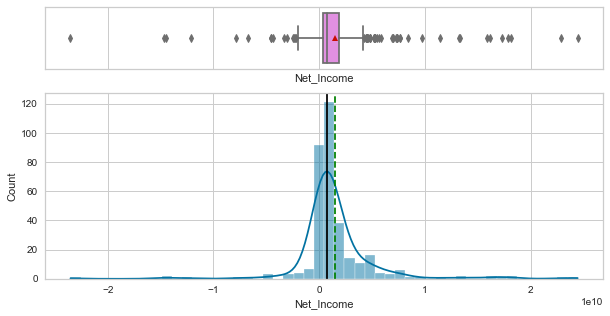

In [23]:
histogram_boxplot(data, num_cols[6], bins=50, kde=True, figsize=(10, 5))

- Net income is distributed normally. 

#### `Earnings Per Share`

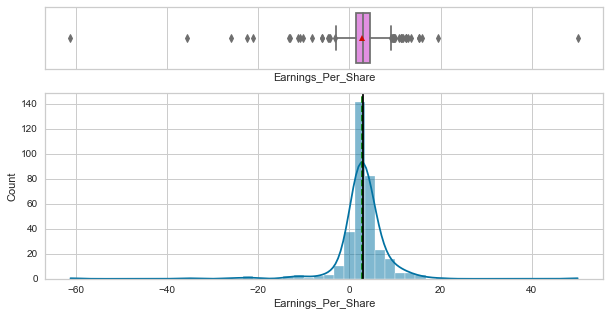

In [24]:
histogram_boxplot(data, num_cols[7], bins=50, kde=True, figsize=(10, 5))

- Earnings per share is distrubted normally with a slight left skew. 

#### `Estimated Shares Outstanding`

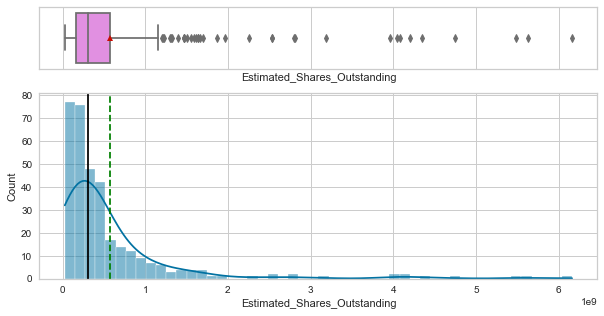

In [25]:
histogram_boxplot(data, num_cols[8], bins=50, kde=True, figsize=(10, 5))

- Estimated shares outstanding is heavily skewed towards the right. 

#### `P/E Ratio`

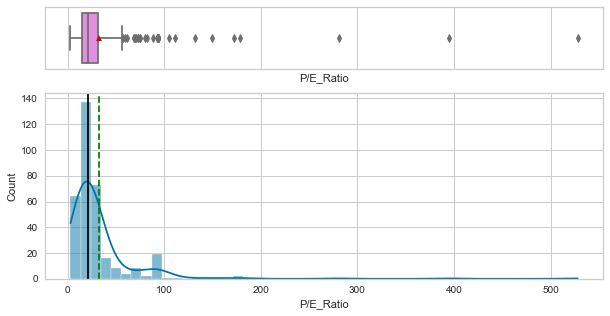

In [26]:
histogram_boxplot(data, num_cols[9], bins=50, kde=True, figsize=(10, 5))

- P/E ratio has a heavy skew towards the right. The median value is approximately 40. 

#### `P/B Ratio`

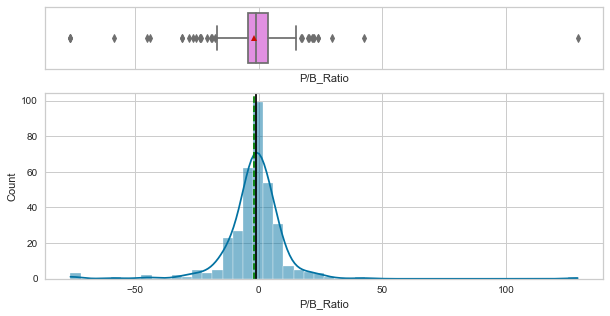

In [27]:
histogram_boxplot(data, num_cols[10], bins=50, kde=True, figsize=(10, 5))

- P/B ratio is disributed normally. 

### Multivariate Analysis

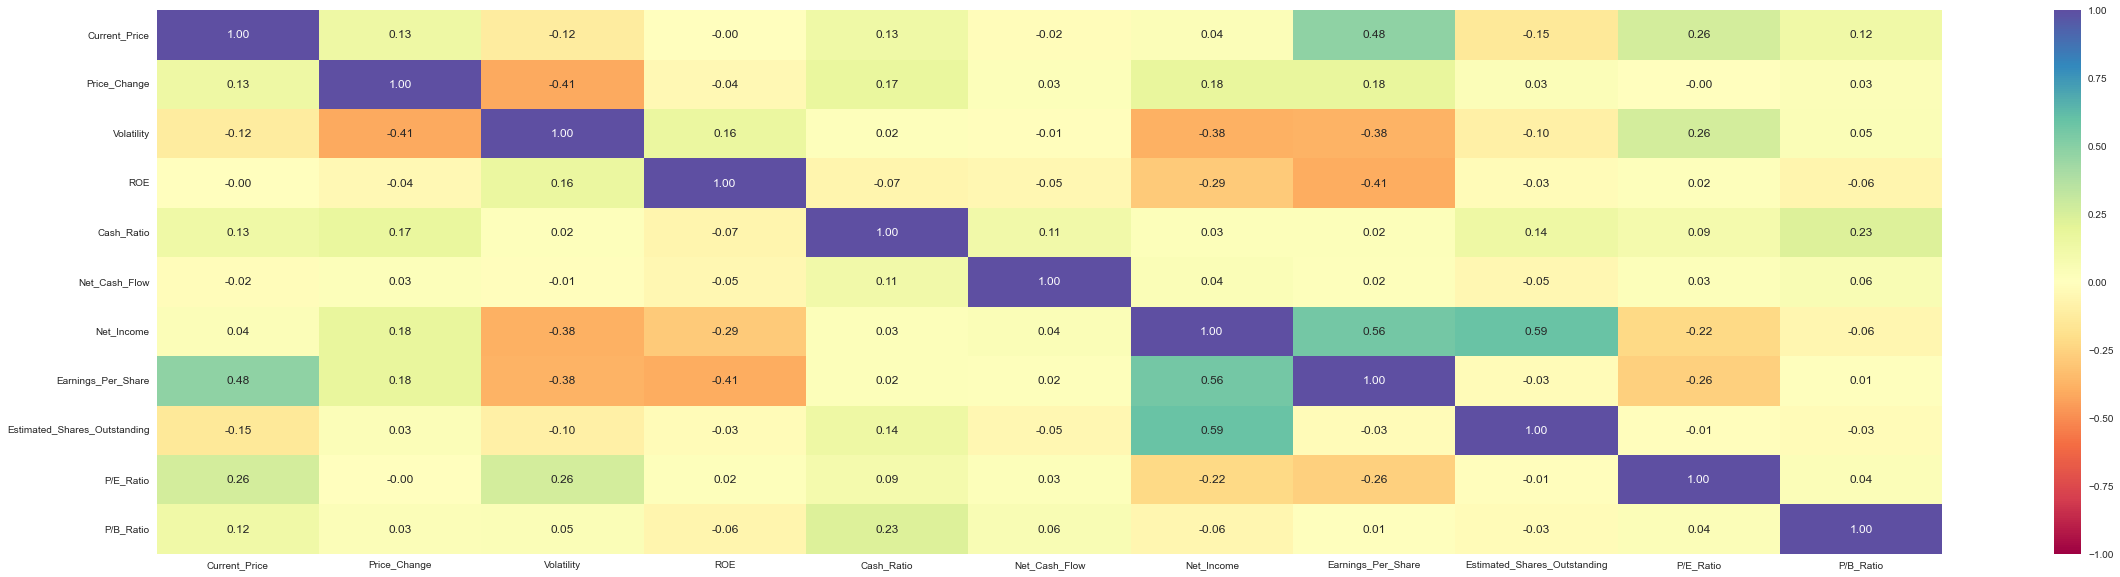

In [28]:
# check for correlation
plt.figure(figsize=(40, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Some variables are significantly correlated with one another.
- `Price_Change` and `Volatility` are negatively correlated. This suggests that the more volatiile the stocks, the more negative the price change. 
- `Earnings_Per_Share` has positive correlation with both `Current_Price` and `Net_Income`.
- `Earnings_Per_Share` has a negative correlation with `ROE` and `Volatility`.
- `Estimated_Shares_Outstanding` has a positive correlation with `Net_Income`.

### Questions:
#### 1. What does the distribution of stock prices look like?


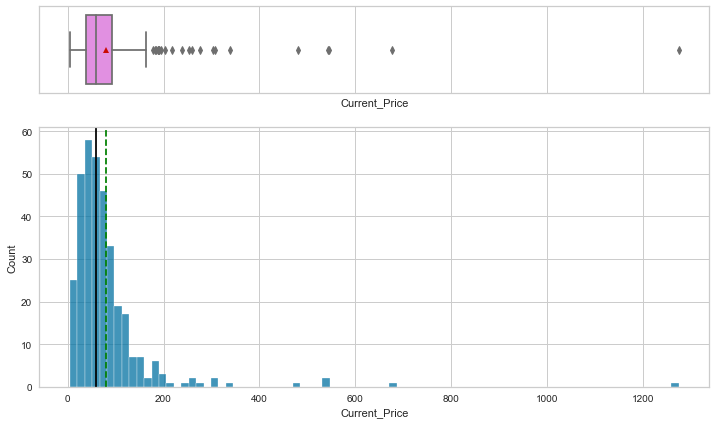

In [29]:
# Observations on Current Price 
histogram_boxplot(data, "Current_Price")

- Stock prices is skewed to the right.
- There are several outliers to the right of the variable.

#### 2. The stocks of which economic sector have seen the maximum price increase on average?


In [30]:
data.groupby("GICS_Sector")["Current_Price"].mean()

GICS_Sector
Consumer Discretionary         128.095404
Consumer Staples                71.972807
Energy                          46.042334
Financials                      58.659183
Health Care                    132.048250
Industrials                     74.411807
Information Technology          63.548485
Materials                       76.551501
Real Estate                     90.976925
Telecommunications Services     32.964000
Utilities                       52.968542
Name: Current_Price, dtype: float64

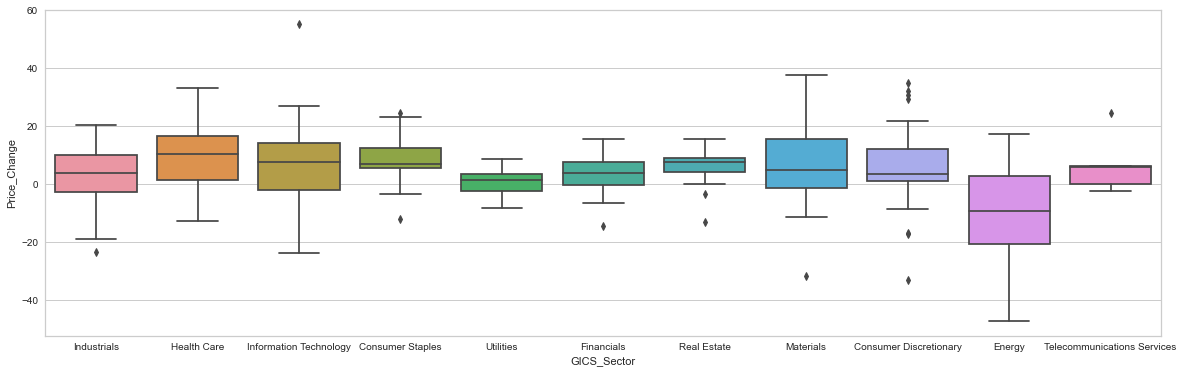

In [31]:
# Stock Price Change Vs. GICS Sector

plt.figure(figsize=(20,6))
sns.boxplot(data = data, y = "Price_Change", x = "GICS_Sector");

- The GICS Health Care sector has the maximum variation in `Price_Change` across sectors. 

#### 3. How are the different variables correlated with each other?


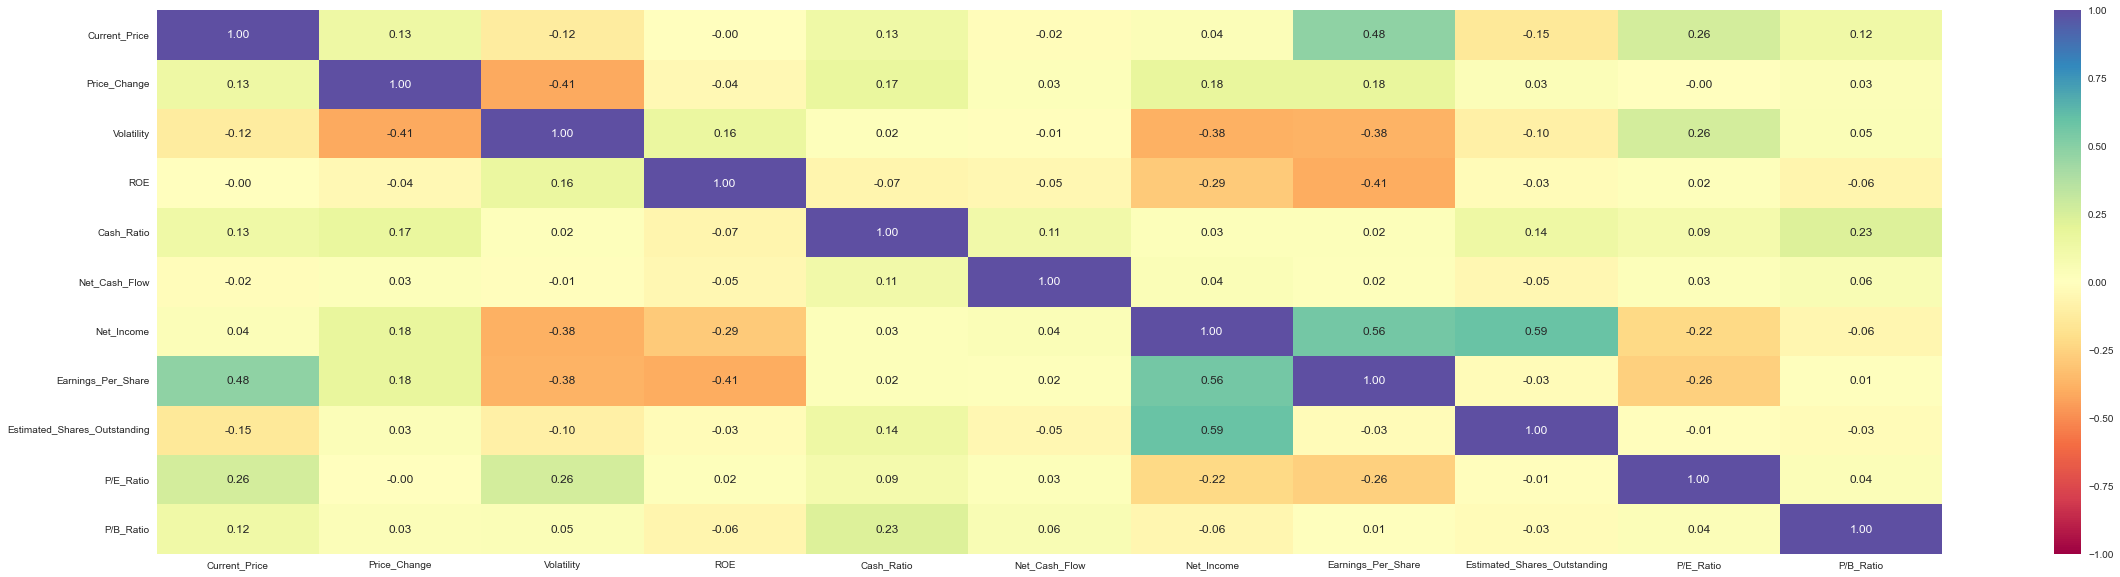

In [32]:
# check for correlation
plt.figure(figsize=(40, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Some variables are significantly correlated with one another.
- `Price_Change` and `Volatility` are negatively correlated. This suggests that the more volatiile the stocks, the more negative the price change. 
- `Earnings_Per_Share` has positive correlation with both `Current_Price` and `Net_Income`.
- `Earnings_Per_Share` has a negative correlation with `ROE` and `Volatility`.
- `Estimated_Shares_Outstanding` has a positive correlation with `Net_Income`.

#### 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?


In [33]:
data.groupby("GICS_Sector")["Cash_Ratio"].mean()

GICS_Sector
Consumer Discretionary          49.575000
Consumer Staples                70.947368
Energy                          51.133333
Financials                      98.591837
Health Care                    103.775000
Industrials                     36.188679
Information Technology         149.818182
Materials                       41.700000
Real Estate                     50.111111
Telecommunications Services    117.000000
Utilities                       13.625000
Name: Cash_Ratio, dtype: float64

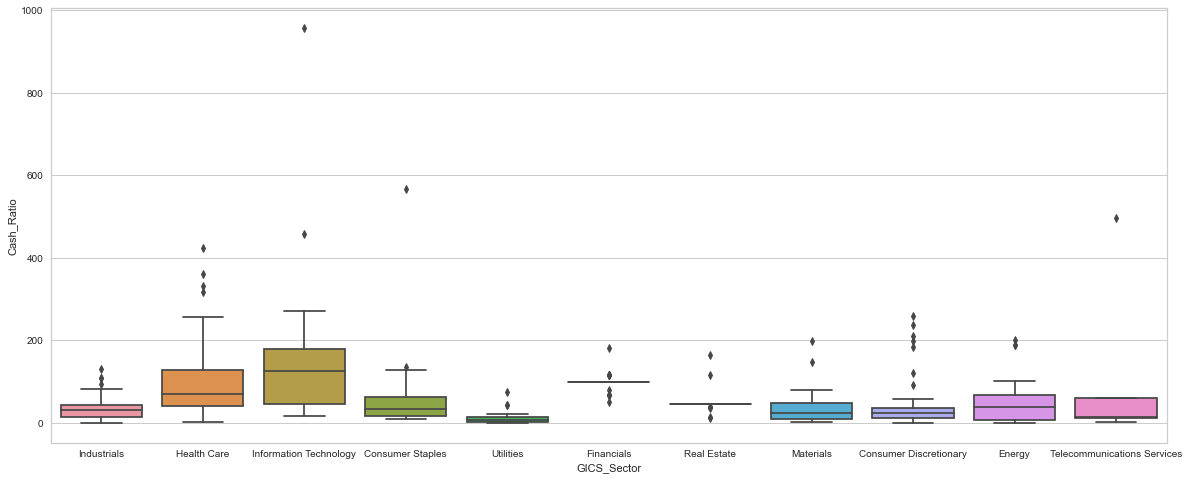

In [34]:
# Cash Ratio vs. GICS Sector

plt.figure(figsize=(20,8))
sns.boxplot(data = data, y = "Cash_Ratio", x = "GICS_Sector");

- Information Technology and Telecommunications Services show the highest cash ratio.
- Utilities has the lowest cash ratio among the economic sectors. 

#### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [35]:
data.groupby("GICS_Sector")["P/E_Ratio"].mean()

GICS_Sector
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Energy                         72.897709
Financials                     16.023151
Health Care                    41.135272
Industrials                    18.259380
Information Technology         43.782546
Materials                      24.585352
Real Estate                    43.065585
Telecommunications Services    12.222578
Utilities                      18.719412
Name: P/E_Ratio, dtype: float64

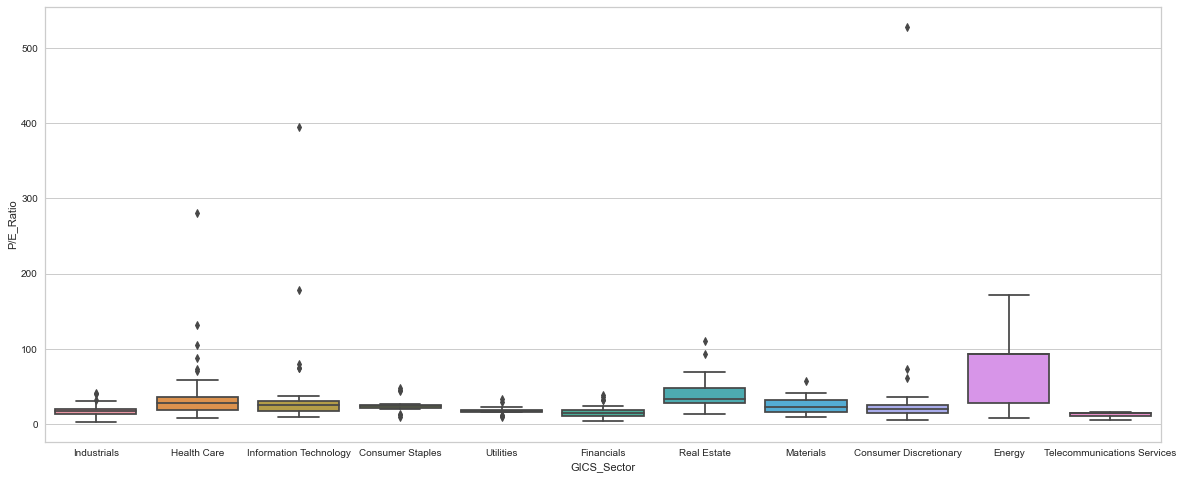

In [36]:
plt.figure(figsize=(20,8))
sns.boxplot(data = data, y = "P/E_Ratio", x = "GICS_Sector");

- Energy shows the highest variance bewteen sectors, followed by Real Estate and Information Technology. 
- The highest median P/E ratio is Energy, followed by Real Estate, and Health Care, respectively. 
- Telecommunications has the lowest P/E ratio. 

___
## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Check for duplicated and missing values.

In [37]:
# check for duplicates
data.duplicated().sum()

0

- There are no duplicates in the data.

In [38]:
# check for missing values
data.isnull().sum()

Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

- There are no missing values. 

### Outlier check

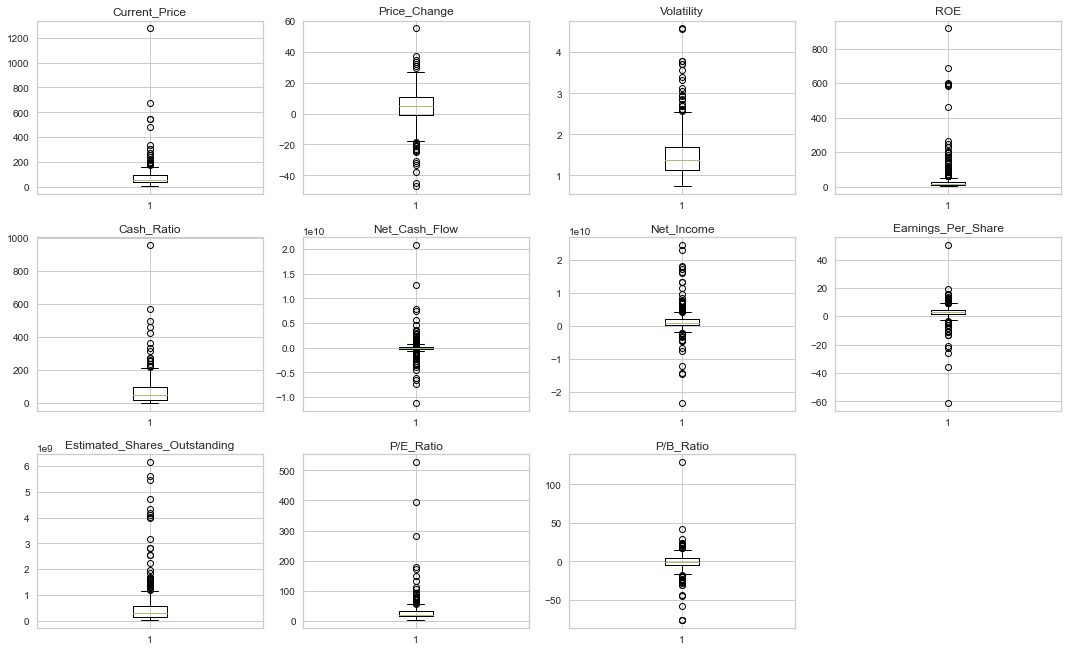

In [39]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


- Outliers have been identified, but not treated as they assumed to be real data points and not improper values. 

### Feature Scaling 

In [40]:
# make a copy of the original dataframe
df=data.copy()

In [41]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [42]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [43]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

___
## EDA

- It is a good idea to explore the data once again after manipulating it.
- data has not been manipulated, only scaled. I will check the correlation to see if there is significant change. 

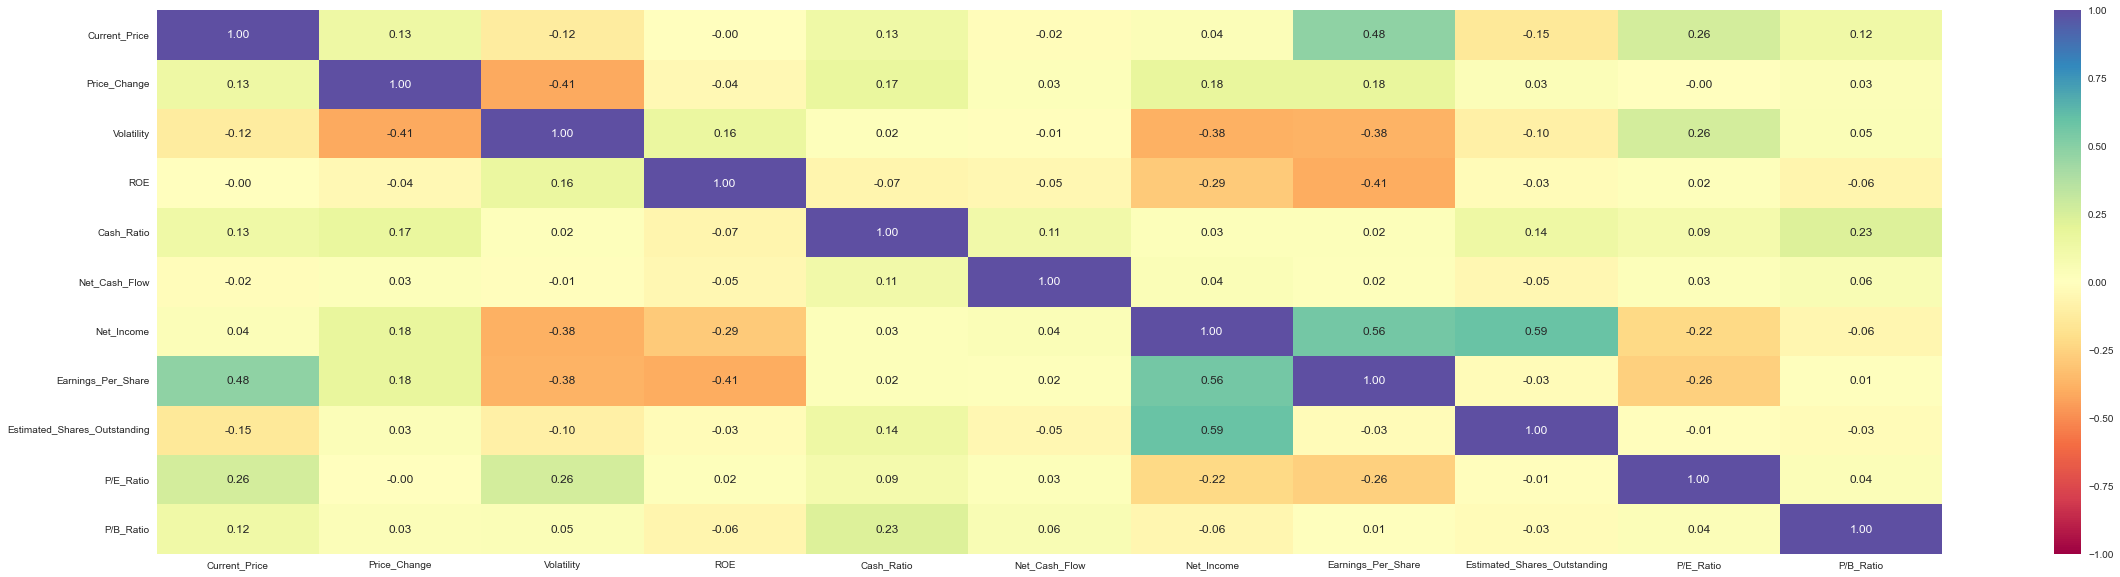

In [44]:
# original correlation matrix
plt.figure(figsize=(40, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

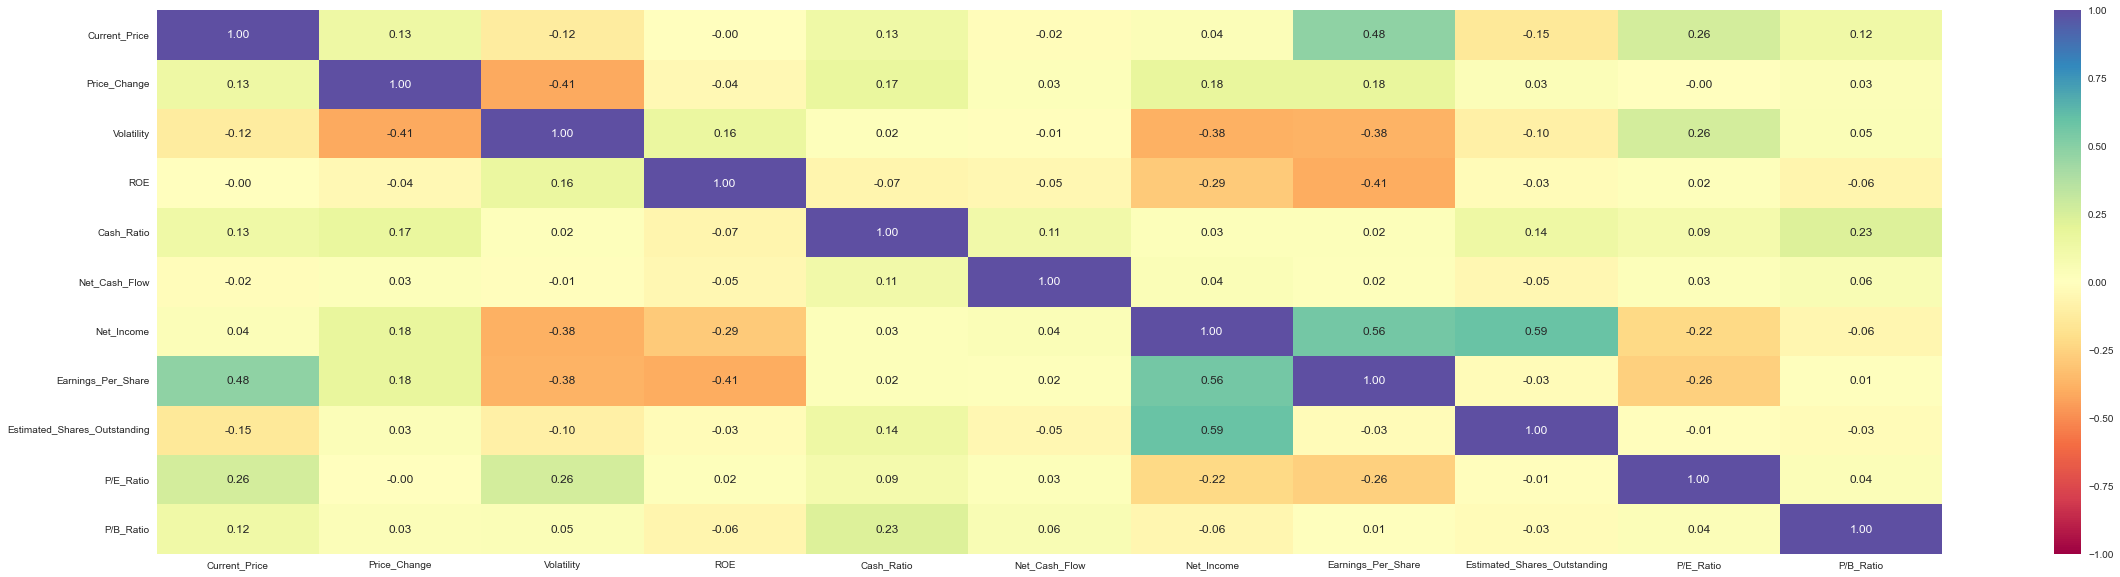

In [45]:
# check for correlation in manipulated data
plt.figure(figsize=(40, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- the column `k_means_segments` was added to the dataset. It does not appear to have significant correlation. 

___
## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.1091649078024215
Number of Clusters: 6 	Average Distortion: 2.072769863902725
Number of Clusters: 7 	Average Distortion: 2.0384558361820915
Number of Clusters: 8 	Average Distortion: 1.9415619514325455


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

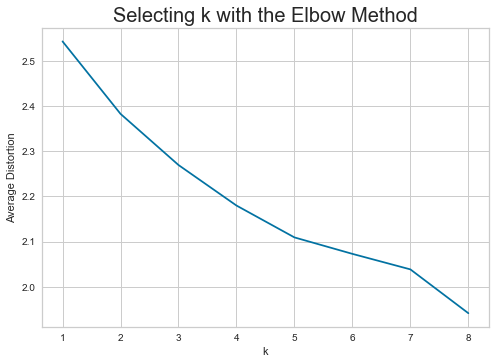

In [46]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

#### The appropriate k value from the elbow curve might be 3 or 4. 

For n_clusters = 2, silhouette score is 0.43969639509980457
For n_clusters = 3, silhouette score is 0.4612764908542453
For n_clusters = 4, silhouette score is 0.4577225970476733
For n_clusters = 5, silhouette score is 0.38750086306701376
For n_clusters = 6, silhouette score is 0.39017258388273185
For n_clusters = 7, silhouette score is 0.39907838853261723
For n_clusters = 8, silhouette score is 0.42865814744767583


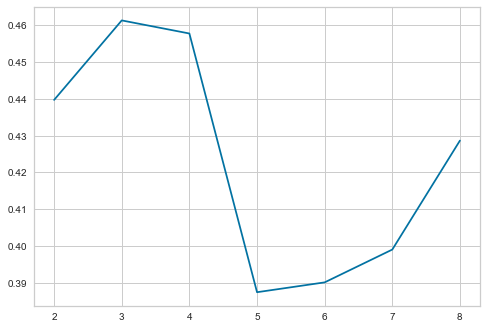

In [47]:
sil_score = []
cluster_list = list(range(2, 9))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

#### With further refining via silhouette scores, the selected value for k will be 3. 

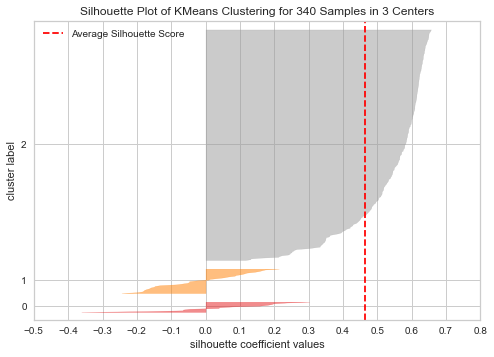

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

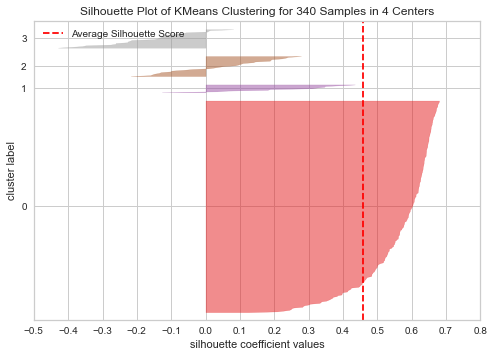

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

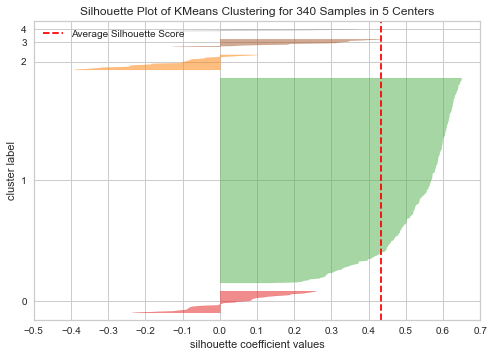

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

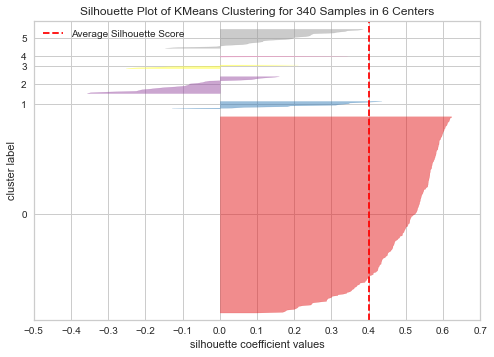

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

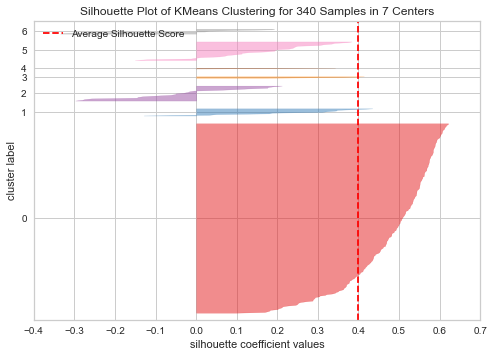

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

#### 3 has been determined as the appropriate number of clusters. The silhouette score is acceptable, and there is an approximate elbow at 3 in the elbow curve. 

In [53]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [54]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [55]:
cluster_profile1 = df.groupby("K_means_segments").mean()

In [56]:
cluster_profile1["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Net_Income"].count().values
)

In [57]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="pink", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995152,110.461063,1.651207,33


### Insights:
#### Cluster 0:
- has the highest distribution of Net_Income at 293.
- highest current stock price.
#### Cluster 1:
- has the lowest distribution of Net_Income at 14.
- lowest current stock price. 
#### Cluster 2: 
- has the median distribution of Net_Income at 33. 
- median current stock price. 

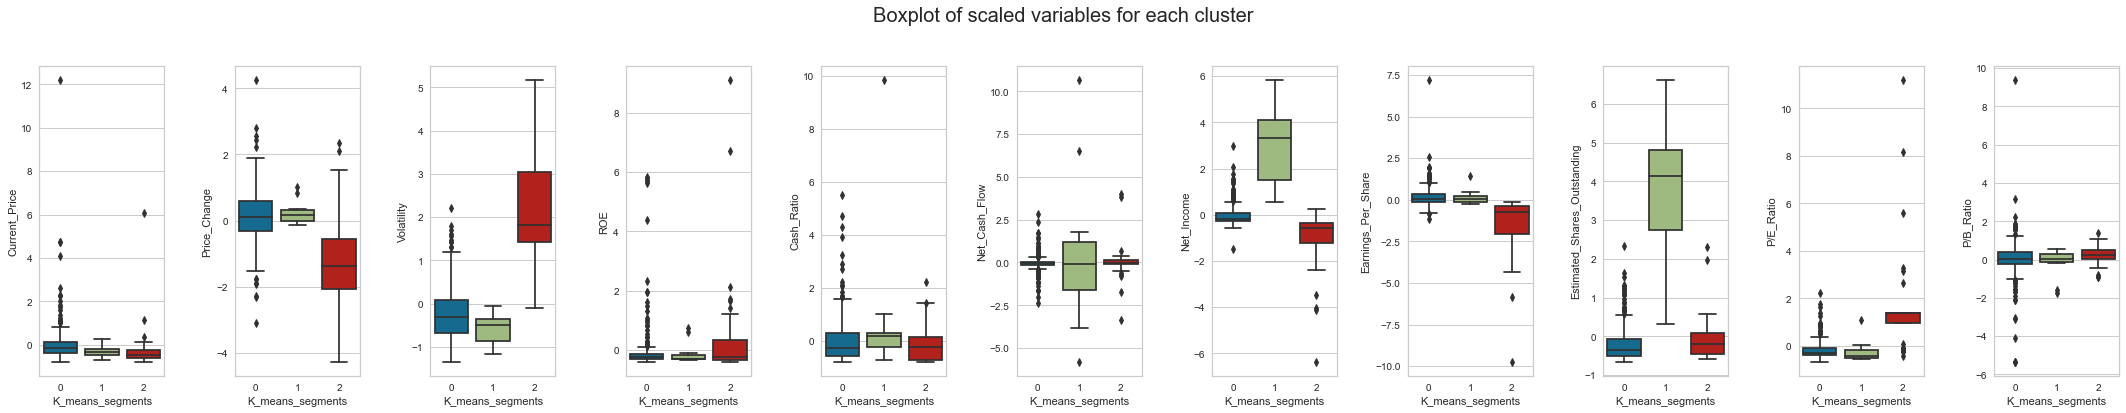

In [58]:
fig, axes = plt.subplots(1, 11, figsize=(30, 6))
fig.suptitle("Boxplot of scaled variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=subset_scaled_df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

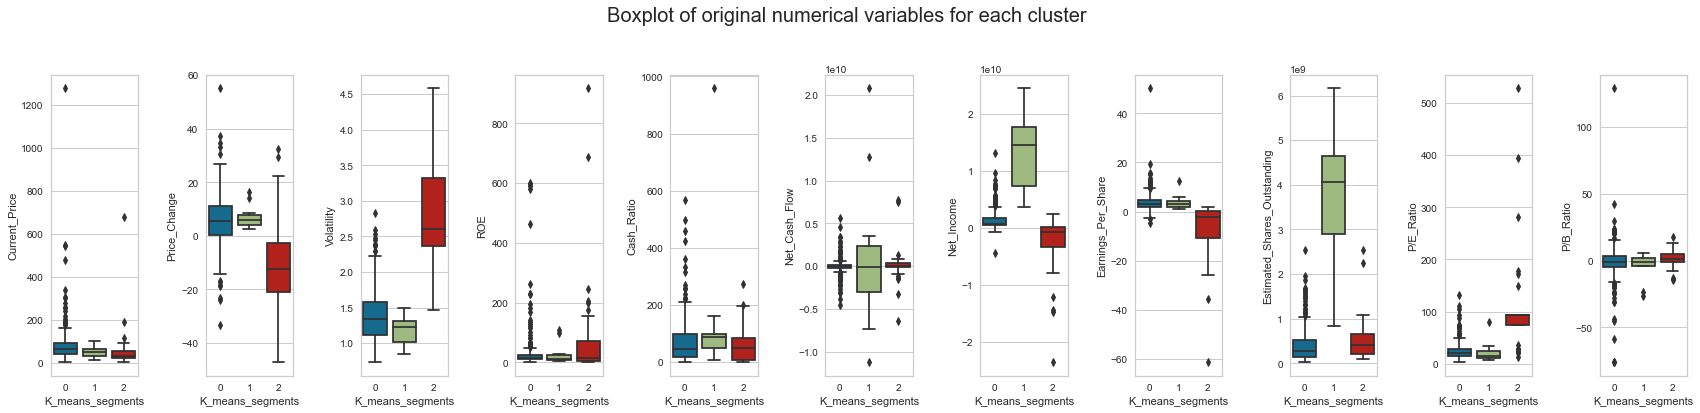

In [59]:
fig, axes = plt.subplots(1, 11, figsize=(24, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

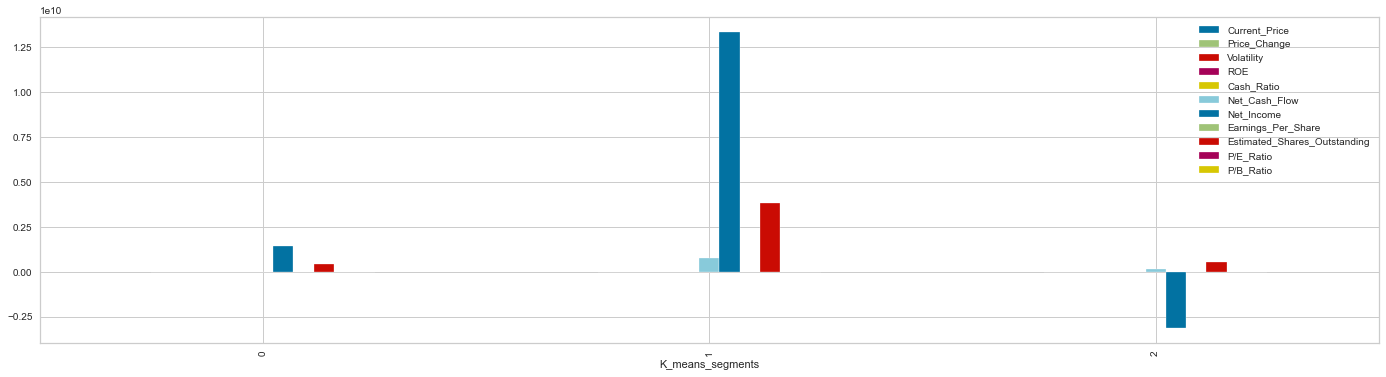

In [60]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(24, 6))

### Comparing Cluster v. GICS Sector

In [61]:
pd.crosstab(df.K_means_segments, df.GICS_Sector).style.highlight_max(
    color="pink", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
K_means_segments,,,,,,,,,,,
0,37,18,5,45,36,52,27,19,27,3,24
1,1,1,1,4,3,0,2,0,0,2,0
2,2,0,24,0,1,1,4,1,0,0,0


- Cluster 0 has the highest segment of the economy with the exception of the energy sector. 
- The energy sector has the highest results in cluster 2. 

___
## Hierarchical Clustering

In [62]:
# make another copy of the dataset
df1=df.copy()

In [63]:
# checking information about various datatypes. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Security                      340 non-null    object 
 1   GICS_Sector                   340 non-null    object 
 2   GICS_Sub_Industry             340 non-null    object 
 3   Current_Price                 340 non-null    float64
 4   Price_Change                  340 non-null    float64
 5   Volatility                    340 non-null    float64
 6   ROE                           340 non-null    int64  
 7   Cash_Ratio                    340 non-null    int64  
 8   Net_Cash_Flow                 340 non-null    int64  
 9   Net_Income                    340 non-null    int64  
 10  Earnings_Per_Share            340 non-null    float64
 11  Estimated_Shares_Outstanding  340 non-null    float64
 12  P/E_Ratio                     340 non-null    float64
 13  P/B_R

In [64]:
# drop the K_means_segments column as it is unnecessary for hierarchical clustering
df1.drop("K_means_segments", axis=1, inplace=True)

In [65]:
sc = StandardScaler()
subset_scaled_df1 = pd.DataFrame(df1)
subset_scaled_df1.head()

,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [66]:
sc = StandardScaler()
subset_scaled_df1 = pd.DataFrame(
    sc.fit_transform(df1.drop(["Security","GICS_Sector","GICS_Sub_Industry"], axis=1)),
    columns=df1.drop(["Security","GICS_Sector","GICS_Sub_Industry"], axis=1).columns,
)
subset_scaled_df1.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


In [67]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [68]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


### Exploring linkage methods with Euclidean distance

In [69]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df1, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [70]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


- The cophenic correlation is maximized with Euclidean distance and average linkage. 

### Mapping the dendograms for different linkage methods

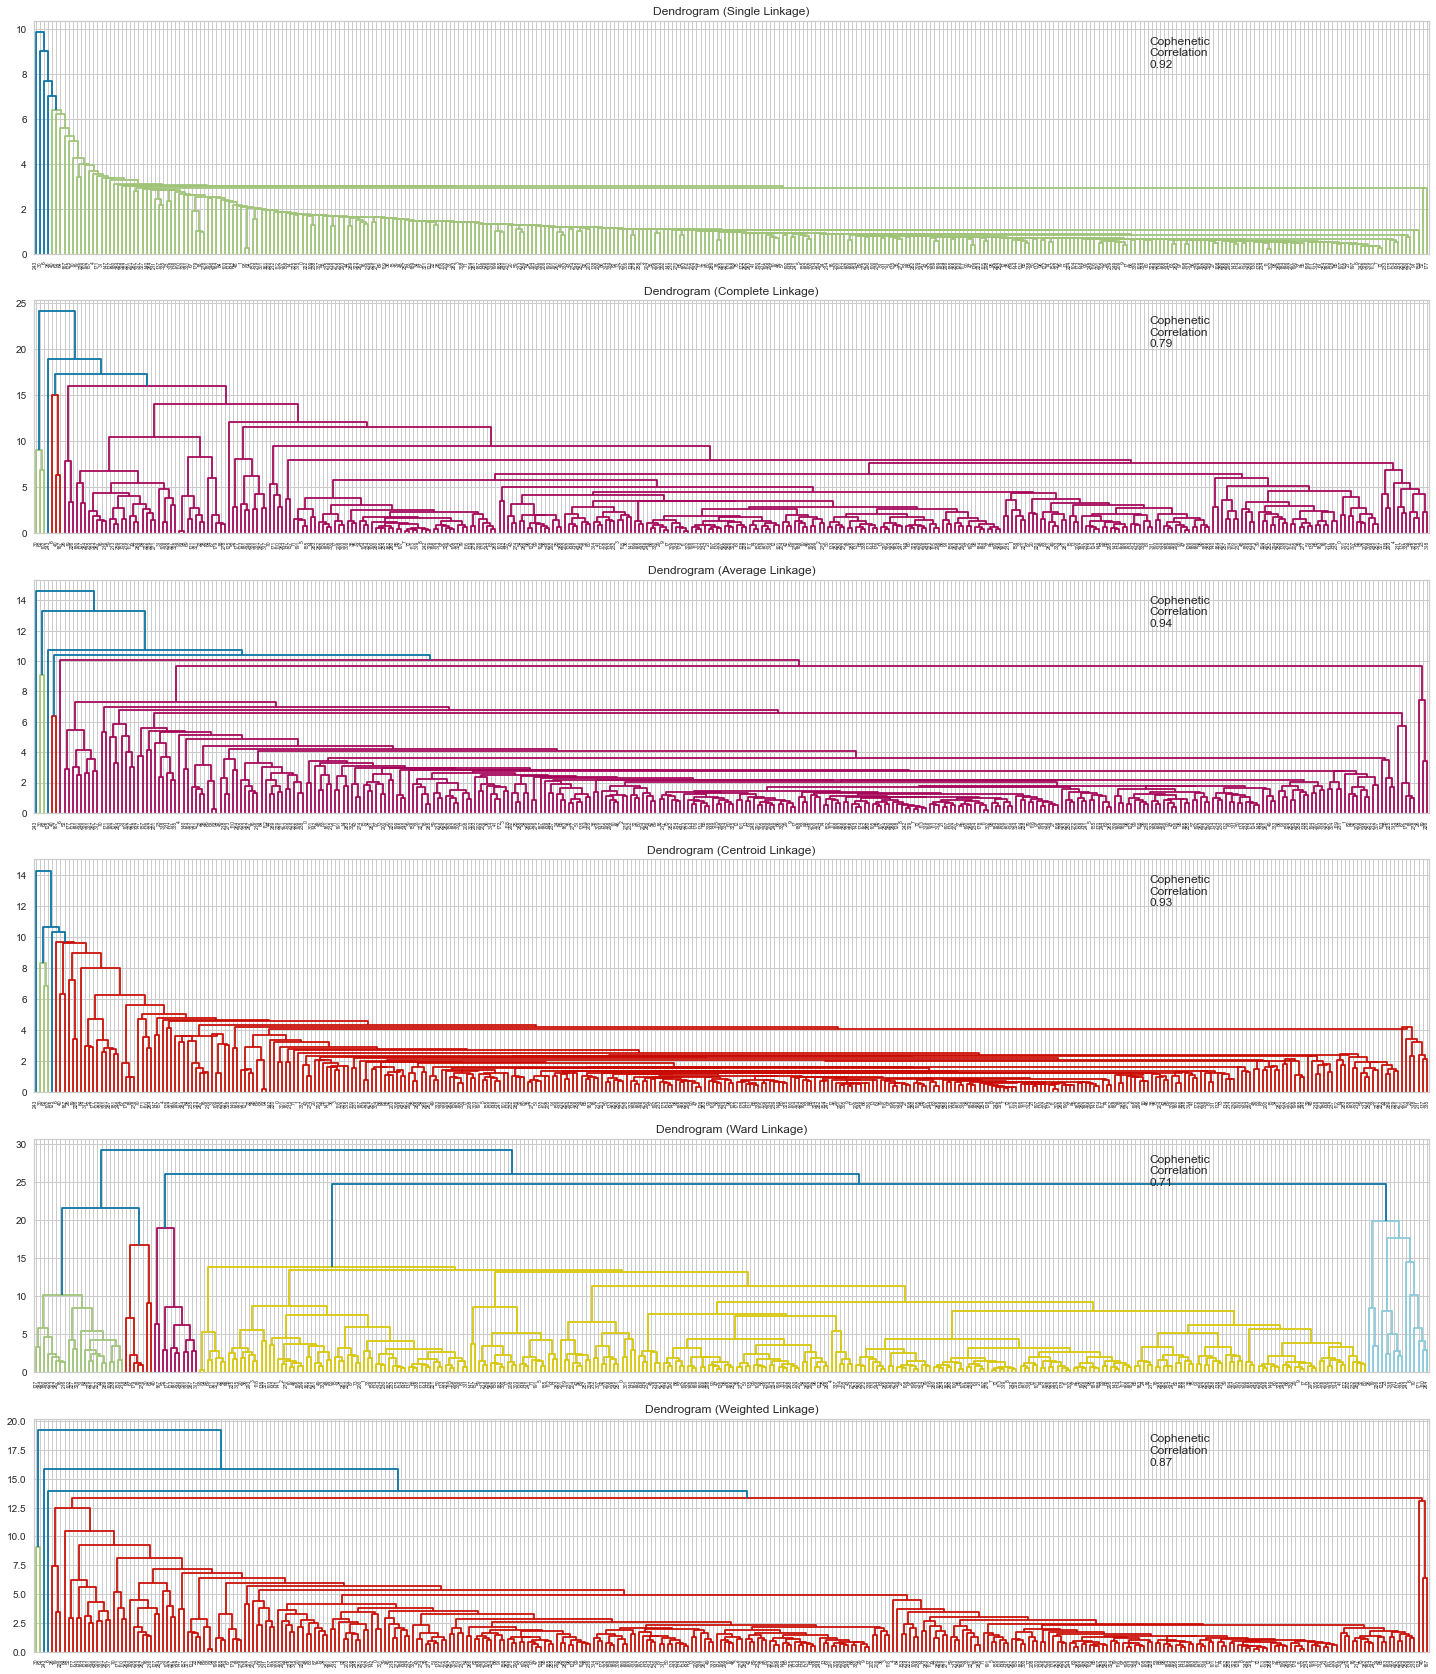

In [71]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(25, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- The cophonetic correlation is highest for the average method. 
- 4 is the apprpriate number of clusters from the dendogram for average linkage. 

In [72]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [73]:
subset_scaled_df1["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [74]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [75]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Net_Income"].count().values
)

In [76]:
# let's see the names of economic sector in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following Economic Sectors are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print()

In cluster 0, the following Economic Sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 2, the following Economic Sectors are present:
['Energy']

In cluster 3, the following Economic Sectors are present:
['Information Technology']

In cluster 1, the following Economic Sectors are present:
['Consumer Discretionary']



- Cluster 0 has the most economic clusters. 
- Let's profile clusters based on ward next. 

In [77]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df1)

AgglomerativeClustering(n_clusters=4)

In [78]:
subset_scaled_df1["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling - Ward

In [79]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [80]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Net_Income"].count().values
)

In [81]:
# let's see the names of economic sector in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following Economic Sectors are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print()

In cluster 3, the following Economic Sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 1, the following Economic Sectors are present:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Financials' 'Real Estate' 'Telecommunications Services'
 'Consumer Staples' 'Materials']

In cluster 0, the following Economic Sectors are present:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Materials' 'Financials' 'Information Technology']

In cluster 2, the following Economic Sectors are present:
['Financials' 'Consumer Discretionary' 'Consumer Staples' 'Health Care'
 'Telecommunications Services' 'Energy']



- The clusters have more variability. 

### The Cluster Profile

In [82]:
# display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275


<AxesSubplot:xlabel='HC_Clusters'>

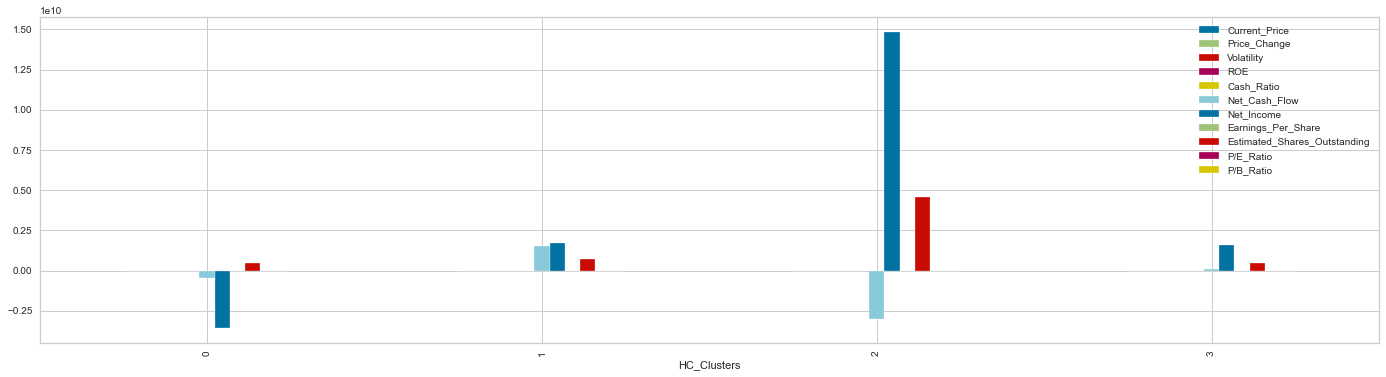

In [83]:
df1.groupby("HC_Clusters").mean().plot.bar(figsize=(24, 6))

### Insights:
- Cluster 0:
    - There are 29 segements under net income. 
    - Volatility and ROE are higher 
    - Returns the lowest net income. 
- Cluster 1:
    - 27 segments
    - highest current price, price change, cash ratio, net cash flow, earnings per share, P/E ratio, and P/B ratio. 
- Cluster 2:
    - 9 segements. 
    - Highest net income
- Cluster 3: 
    - 275 segments
    - no outstanding measures. 

___
## K-means vs Hierarchical Clustering

You can compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

### Scatterplot by cluster labels -- K - means clustering

In [84]:
# dimensionality reduction using PCA for visualization

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

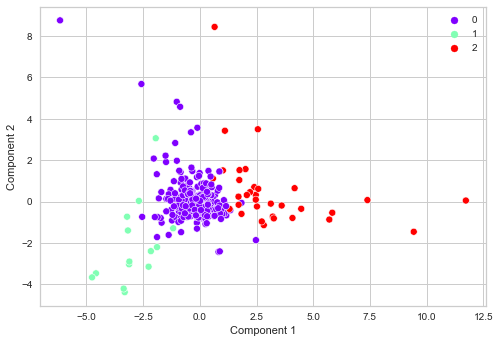

In [85]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

### Scatterplot for cluster labels - Hierarchical Clustering

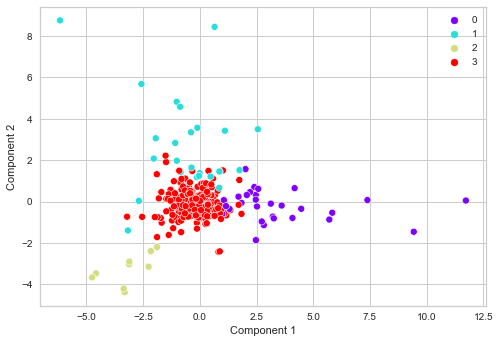

In [86]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Hierarchical clustering returns more clusters at 4 compared to K-means clustering with 3 clusters. 
- Both clusters are quite condensed together; however, it appears that K-means clustering has more distinct clusters than hierarchical clustering. 
- Let's display the cluster profiles and see numeric data from the graphs. 

#### Hierarchicial Clustering Profile

In [87]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275


#### K-means segments


In [88]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995152,110.461063,1.651207,33


- Hierarchical clustering returns the highest current price, price change, ROE, cash ratio, net cash flow, net income, earnings per share, estimated shares outstanding, p/e ratio, p/b ratio.
- K-means segments has the highest count in each segment and volatility. 
- Both performed fairly well, with hierarchical clustering returning the best results. 

___
## Actionable Insights and Recommendations

- The data analysis conducted showed that the current prices of stocks and estimated shares outstanding are skewed to the right with positive outliers in various sectors. Among these sectors, healthcare and financial have shown the highest positive price change in the past 13 weeks, making them attractive to investors. Information technology and financial sectors have some of the highest cash ratios, making them favorable compared to other sectors. On the other hand, the real estate sector has shown minimal variation in price change and cash ratio across its securities, making it a safer investment choice. The energy sector has high variance in price change, indicating more volatility and riskiness, but some securities have high P/E ratios, indicating that investors are willing to invest more per dollar of earnings.

- Two clustering methods were used to group the securities, resulting in 331 similarly-clustered securities and 9 differently-clustered ones. The clusters were mostly based on industry, with one very aggressive cluster consisting mostly of healthcare, consumer discretionary, and information technology securities, another very aggressive cluster consisting mostly of energy securities, a moderately aggressive cluster consisting mostly of financial securities, and a large mildly aggressive and diversified cluster consisting mostly of industrials, financials, consumer discretionary, real estate, and information technology securities.

- Overall, it is recommended to split stocks into diversified investments across the four identified clusters to maximize earnings in any market condition. However, it is important to consider that the stock market is often volatile, and past trends may not predict future ones. Therefore, dynamic clustering and further analysis of changing market conditions are necessary for better predictions.

___

Luise Hauptmann